# Weighted Least Squares

Can try different psi functions!

For robust estimations, the least squares can be rewritten as:

$$ \delta(\beta) = \sum \rho(r_i) \\$$
Where
$$ r_i = y_i - x_i \beta $$

Take the derivative of this!

$$ \frac{\delta \triangle}{\delta \beta} = \sum - x_i \rho ' (r_i) \\$$


Showed that weight of the weighted least squares is:

$$ w_i = \frac{\psi(r_i)}{r_i} \\$$ 


## Example

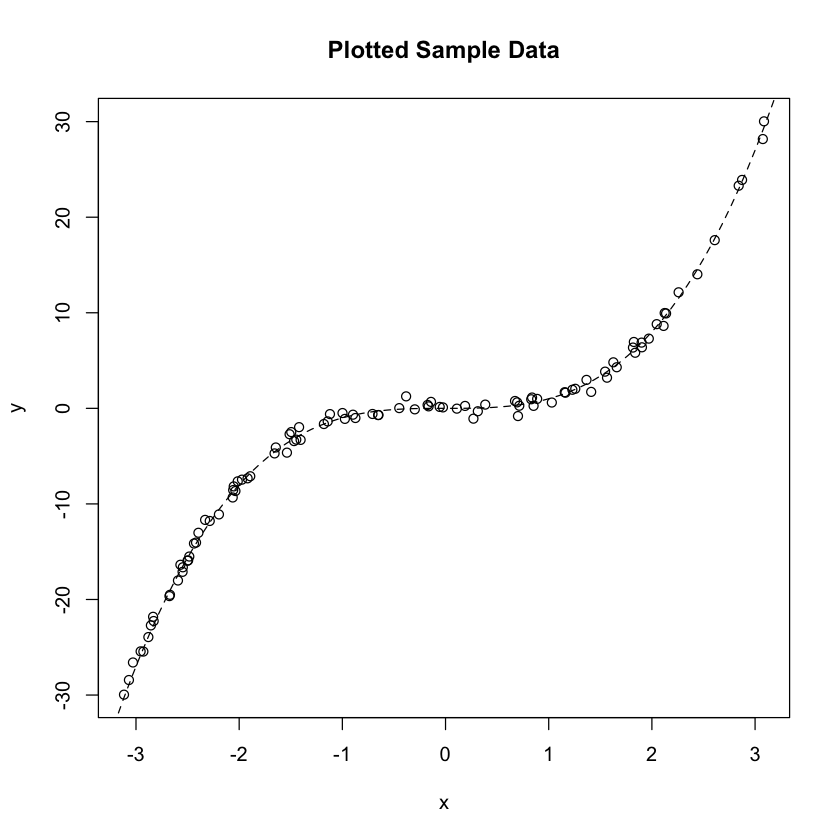

In [3]:
# generate some data
set.seed(34243411) 
n <- 100
from <- -pi
to <- pi
x <- runif(n, from, to)
mu <- function(x) {x^3}
resids <- function(n) {rnorm(n,0,0.5)} 

y <- mu(x) + resids(n)


plot(x,y, main='Plotted Sample Data')
funx <- seq(from = min(x)-1, to=max(x)+1, length.out = 100)
lines(funx, mu(funx), lty=2)

In [4]:
x.mat <- t(x)

In [5]:
lm(y ~ x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
    -0.5229       5.7806  


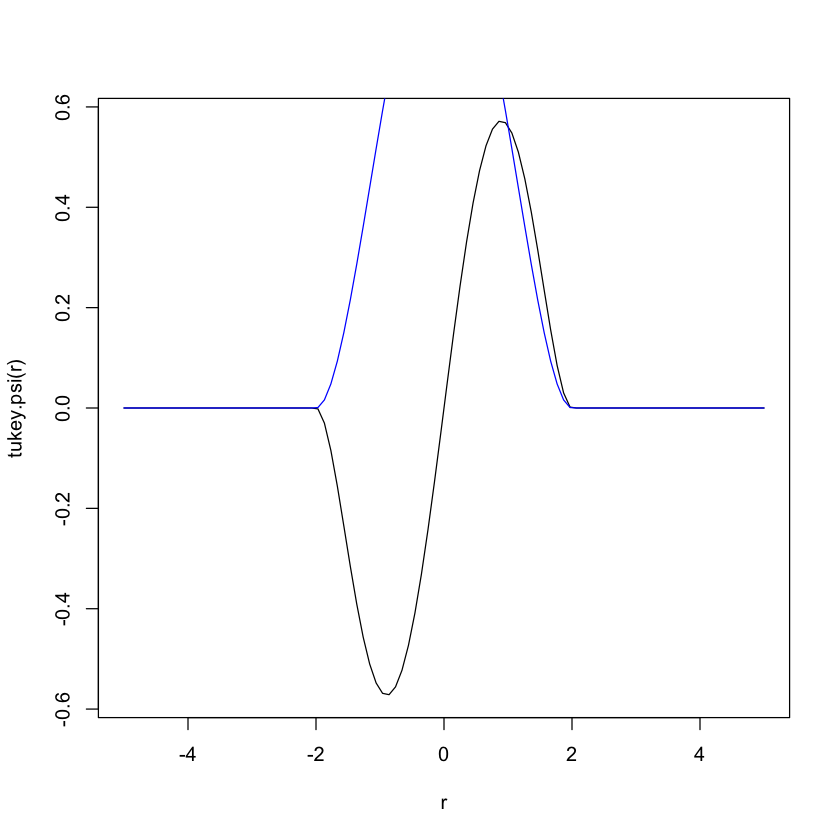

In [6]:
huber.psi <- function(r, a = 1){
    # Huber psi function
    index.a <- abs(r) > a
    r[index.a] <- a * r[index.a] / abs(r[index.a])
    return(r)
}

tukey.psi <- function(r, a = 2){
    # Huber psi function
    index.a <- abs(r) < a
    index.na <- abs(r) >= a
    r[index.a] <- r[index.a]*(1-(r[index.a]/a)^2)^2
    r[index.na] <- 0
    return(r)
}
r <- seq(from = -5, to=5, length.out = 100)
plot(r, tukey.psi(r), type = 'l')
lines(r, tukey.psi(r)/r, col='blue')

In [7]:
iterative.weighted.ls <- function(x, y, psi = tukey.psi){
    # Returns a lm object
    m.j <- lm(y ~ x)
    for (j in 1:1000){
        r.j <- y - m.j$fitted.values
        w.j <- psi(r.j) / r.j
        m.j <- lm(y ~x, weights = w.j)
    }
    return(m.j)
}


ERROR: Error in predict(rlm(y ~ x, psi = "psi.bisquare"), data.frame(x = funx)): could not find function "rlm"


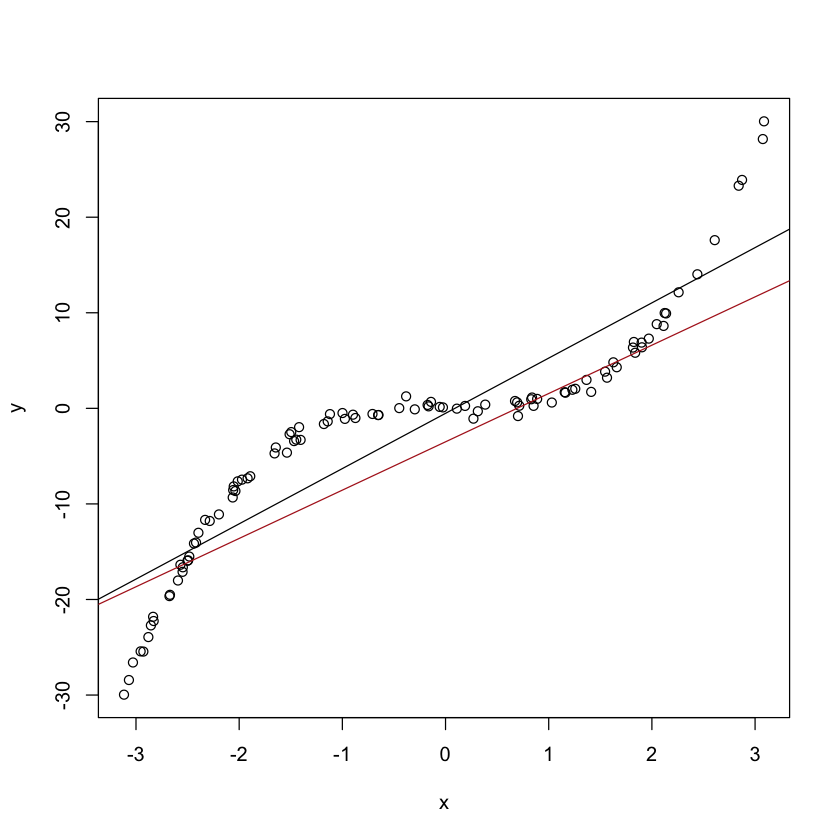

In [8]:
plot(x,y)
lines(funx, predict(iterative.weighted.ls(x,y), data.frame(x = funx)), col='firebrick')
lines(funx, predict(rlm(y ~ x, psi = 'psi.bisquare'), data.frame(x = funx)), col='blue')
# lines(funx, predict(iterative.weighted.ls(x,y, psi=huber.psi), data.frame(x = funx)), col='blue')
lines(funx, predict(lm(y ~ x), data.frame(x = funx)))

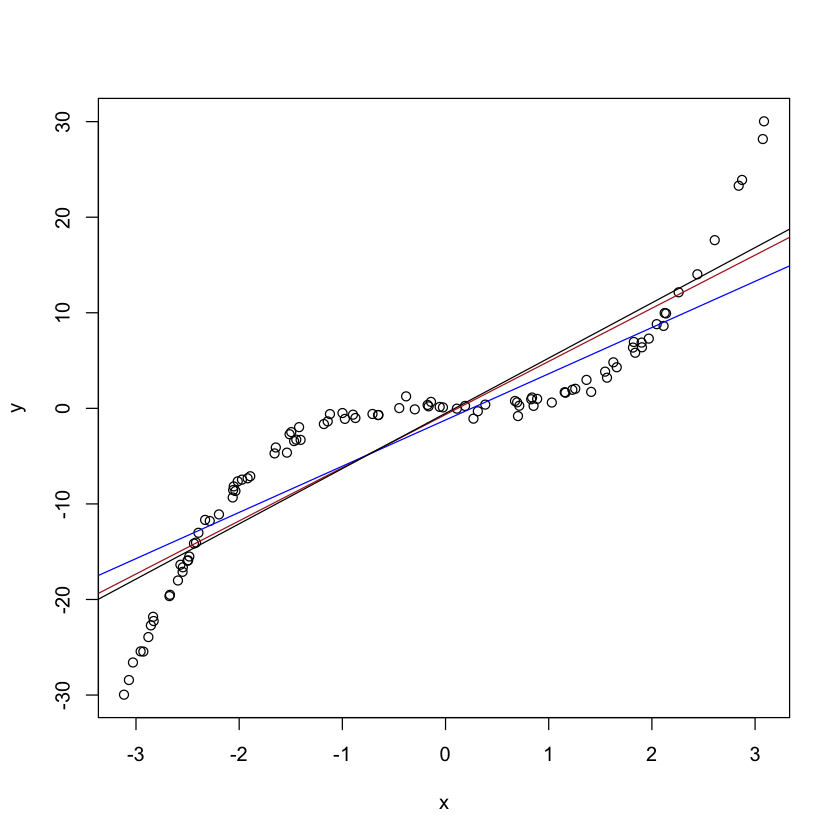

In [9]:
library(MASS)

plot(x,y)
lines(funx, predict(rlm(y ~ x, psi = 'psi.bisquare'), data.frame(x = funx)), col='firebrick')
lines(funx, predict(iterative.weighted.ls(x,y, psi=huber.psi), data.frame(x = funx)), col='blue')
lines(funx, predict(lm(y ~ x), data.frame(x = funx)))

# High Breakdown Regression

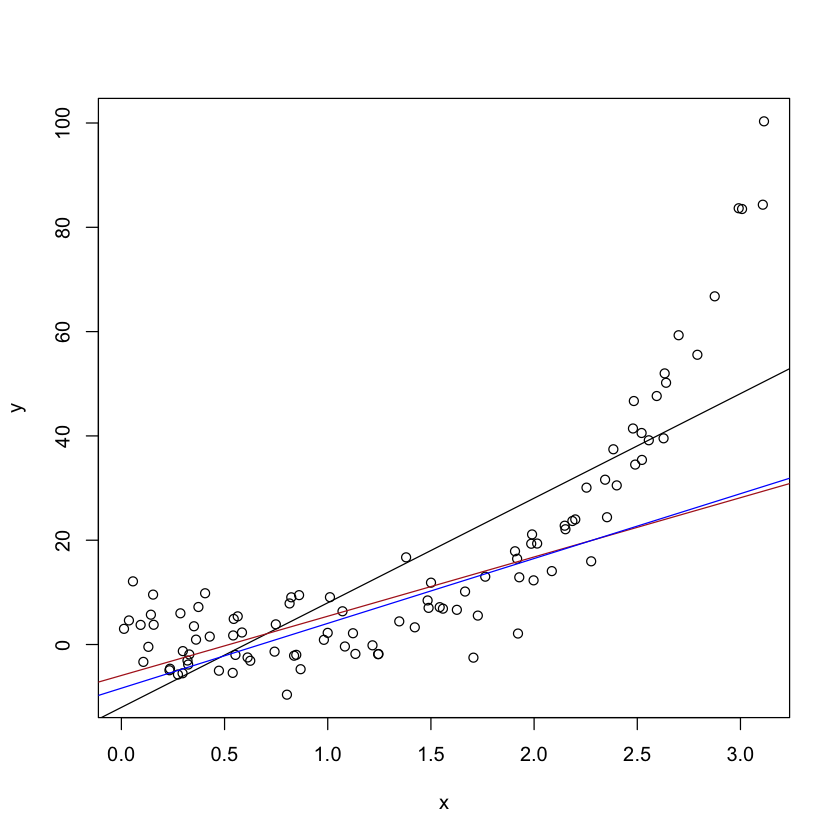

In [16]:
plot(x,y)
lines(funx, predict(lm(y ~ x), data.frame(x = funx)))
# Least median regression, where the quantile is floor((n+1)/2)
lines(funx, predict(lmsreg(y ~ x), data.frame(x = funx)), col='firebrick')

# Least trimmed regression, where the quantile is floor(N/2) + floor((p+1)/2)
lines(funx, predict(ltsreg(y ~ x, ), data.frame(x = funx)), col='blue')

# Power Transformations

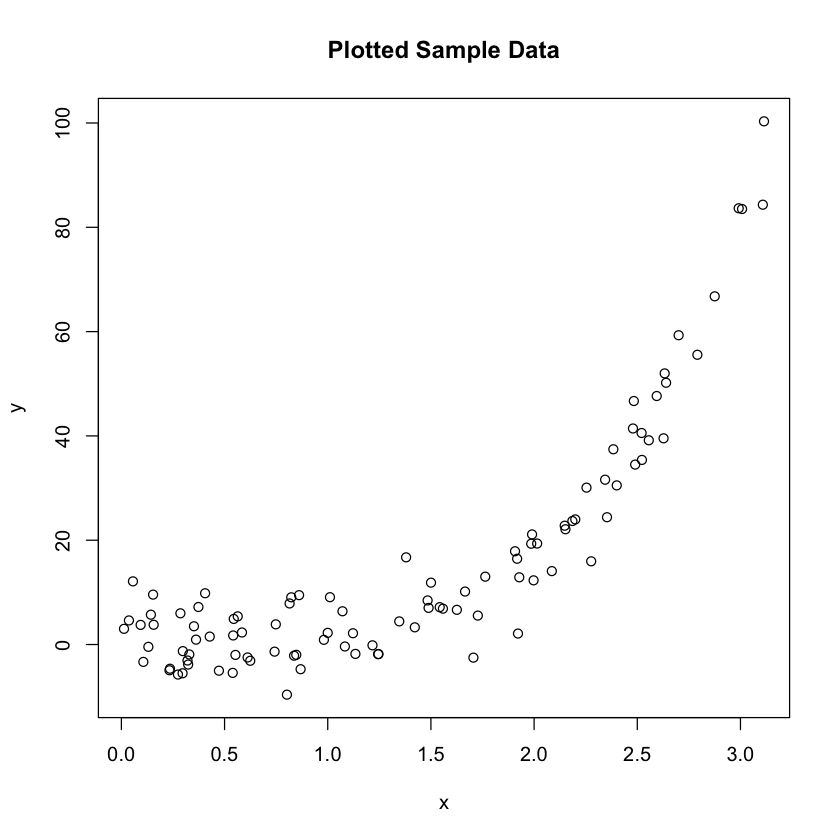

In [11]:
# generate some data
set.seed(34243411) 
n <- 100
from <- 0
to <- pi
x <- runif(n, from, to)
mu <- function(x) {x^4}
resids <- function(n) {rnorm(n,0,5)} 

y <- mu(x) + resids(n)


plot(x,y, main='Plotted Sample Data')
funx <- seq(from = min(x)-1, to=max(x)+1, length.out = 100)
# lines(funx, mu(funx), lty=2)

In [12]:
powerfun <- function(x, lambda = 0){
    if (lambda == 0){
        return(log(x))
    }else {
        return (x^(lambda))
    }
}

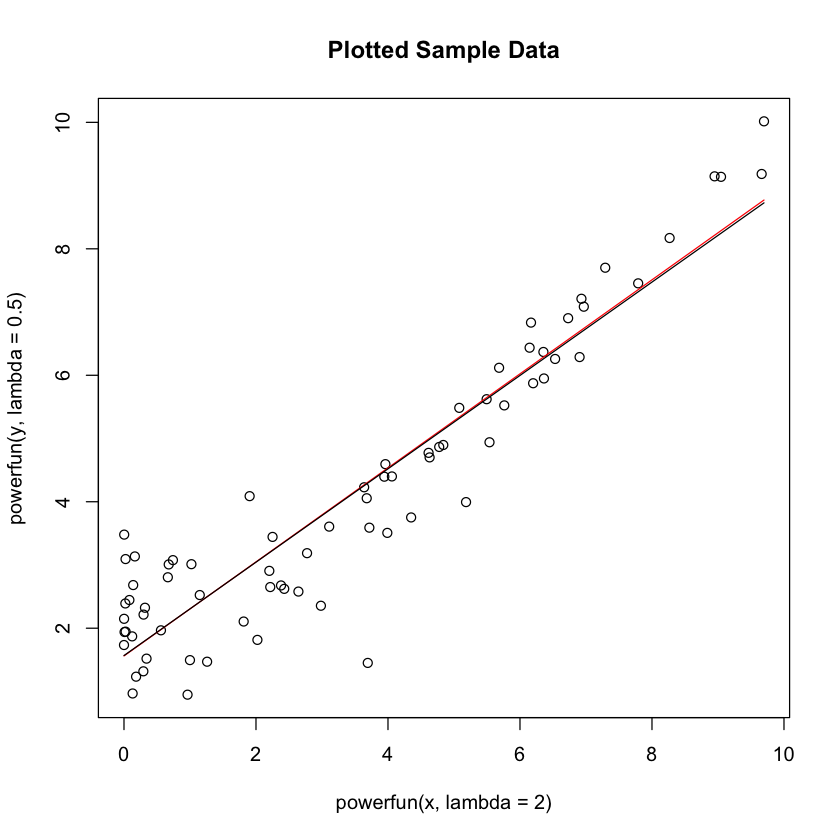

In [34]:
# Try up on x and down on y (according to bump rule)
plot(powerfun(x,lambda = 2),powerfun(y, lambda = 0.5), main='Plotted Sample Data')
y.b <- powerfun(y, lambda = 0.5)
x.b <- powerfun(x,lambda = 2)
xOrder <- order(x.b)
funx <- seq(from=range(x.b)[1], to=range(x.b)[2], length.out = 100)
lines(funx, predict(
        rlm(y ~ x,psi = 'psi.hampel', data=data.frame(x=x.b, y=y.b)), 
    data.frame(x=funx)), col='red')

lines(funx, predict(
        lm(y ~ x, data=data.frame(x=x.b, y=y.b)), 
    data.frame(x=funx)))
# fixes the bump and it does look more linear

Warning message:
In log(x): NaNs produced

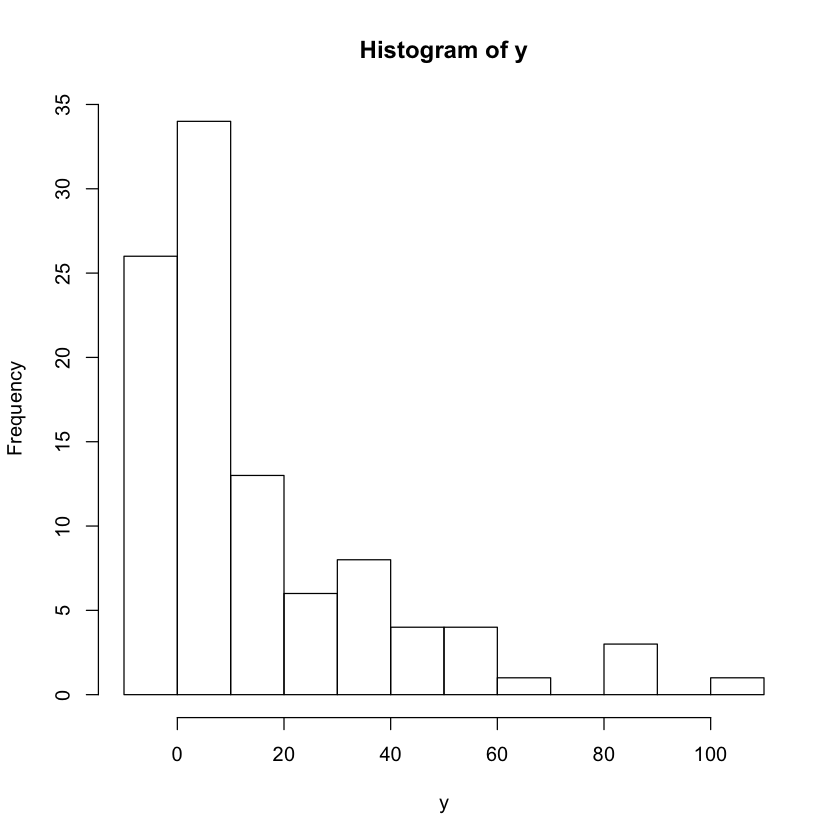

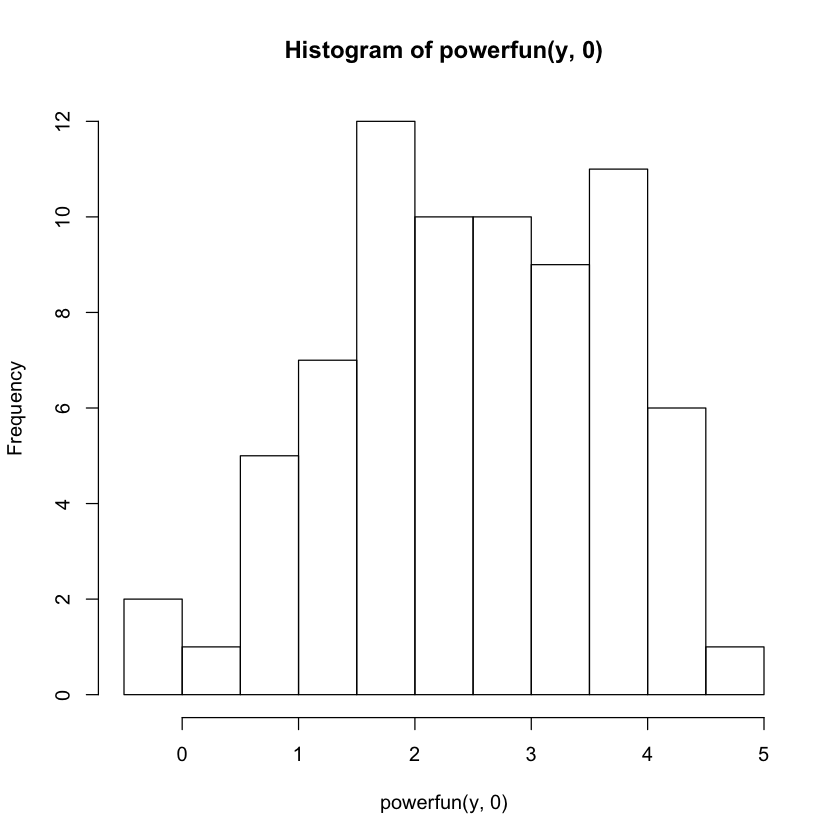

In [14]:
hist(y)
hist(powerfun(y, 0))

Warning message:
In log(x): NaNs produced

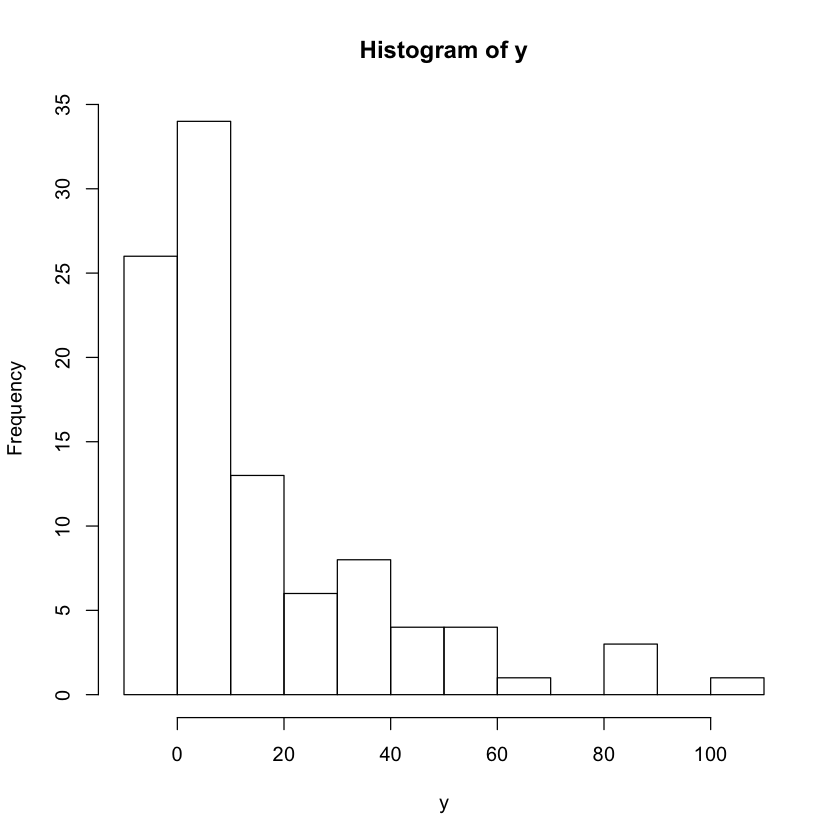

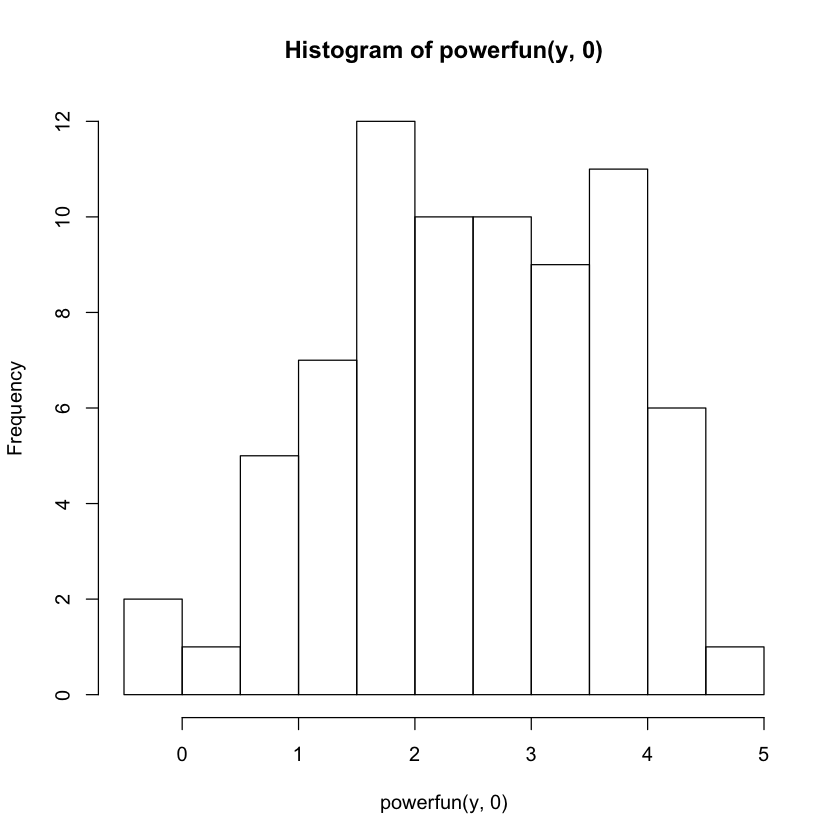

In [15]:
hist(y)
hist(powerfun(y, 0))